age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


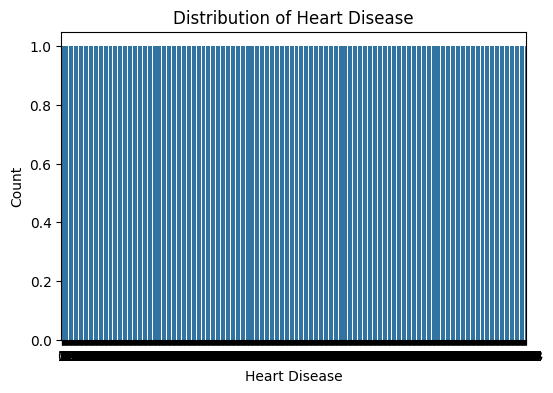

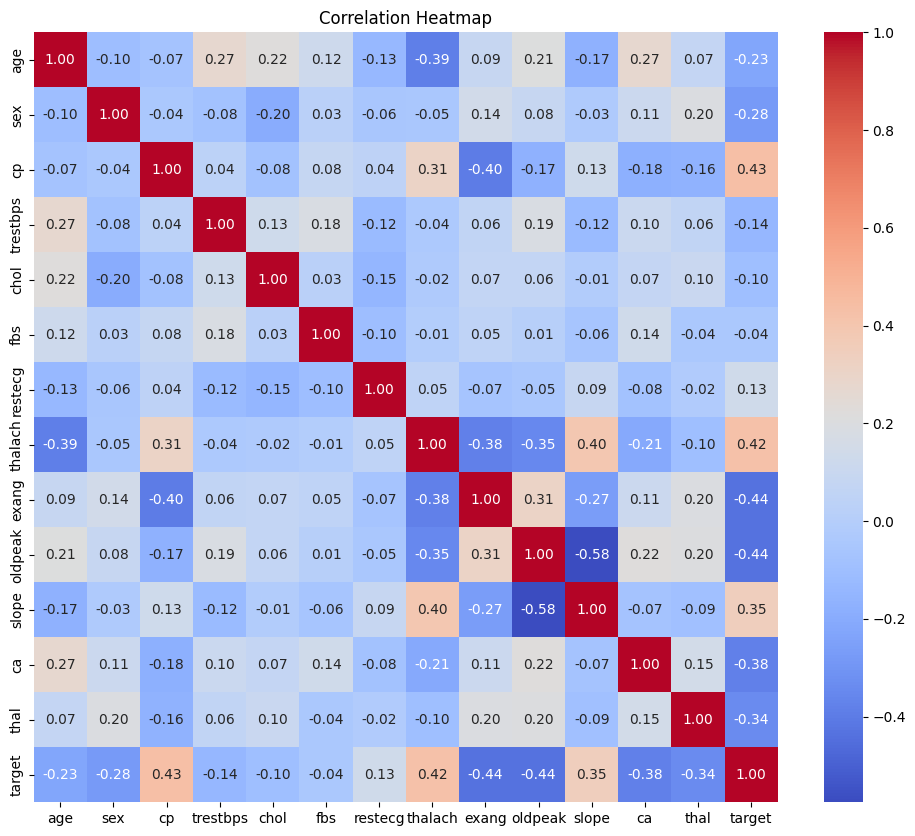

Logistic Regression Accuracy: 0.81
Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.75      0.80       159
           1       0.76      0.87      0.81       149

    accuracy                           0.81       308
   macro avg       0.81      0.81      0.80       308
weighted avg       0.81      0.81      0.80       308

Random Forest Accuracy: 0.98
Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       159
           1       1.00      0.96      0.98       149

    accuracy                           0.98       308
   macro avg       0.98      0.98      0.98       308
weighted avg       0.98      0.98      0.98       308



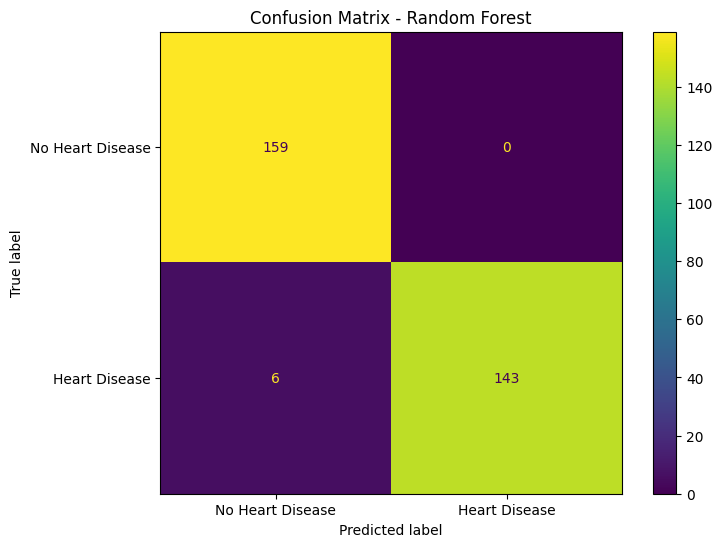

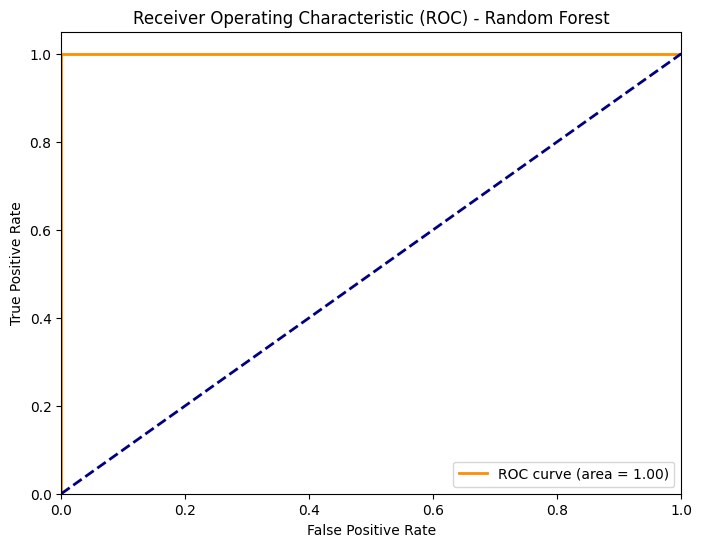

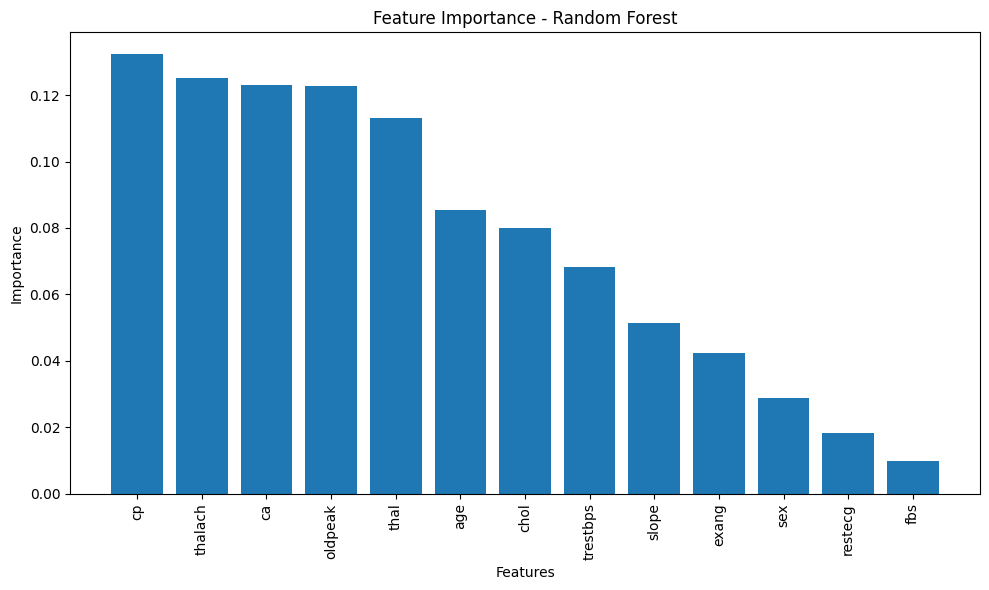

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc

# Load the dataset (using UCI Heart Disease dataset for this example)
data = pd.read_csv('/content/heart (1).csv')

# Data Preprocessing
# Check for missing values
print(data.isnull().sum())

# Handle missing values if any (for simplicity, let's drop them)
data = data.dropna()

# Exploratory Data Analysis (EDA)
# Plotting the distribution of target variable (assuming the target column is named 'target')
plt.figure(figsize=(6, 4))
sns.countplot(data['target'])
plt.title('Distribution of Heart Disease')
plt.xlabel('Heart Disease')
plt.ylabel('Count')
plt.show()

# Plotting correlation heatmap
plt.figure(figsize=(12, 10))
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# Feature Engineering
# Splitting the data into features and target
X = data.drop('target', axis=1)  # Assuming 'target' is the column indicating heart disease presence
y = data['target']

# Standardizing the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Model Building
# 1. Logistic Regression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

# 2. Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

# Model Evaluation
# Logistic Regression Evaluation
y_pred_logreg = logreg.predict(X_test)
logreg_accuracy = accuracy_score(y_test, y_pred_logreg)
print(f"Logistic Regression Accuracy: {logreg_accuracy:.2f}")
print("Logistic Regression Classification Report:")
print(classification_report(y_test, y_pred_logreg))

# Random Forest Evaluation
y_pred_rf = rf_classifier.predict(X_test)
rf_accuracy = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Accuracy: {rf_accuracy:.2f}")
print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))

# Confusion Matrix for Random Forest
conf_matrix = confusion_matrix(y_test, y_pred_rf)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=['No Heart Disease', 'Heart Disease'])
fig, ax = plt.subplots(figsize=(8, 6))
disp.plot(ax=ax)
plt.title("Confusion Matrix - Random Forest")
plt.show()

# ROC Curve for Random Forest
y_pred_rf_proba = rf_classifier.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_pred_rf_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) - Random Forest')
plt.legend(loc="lower right")
plt.show()

# Feature Importance for Random Forest
plt.figure(figsize=(10, 6))
importances = rf_classifier.feature_importances_
indices = np.argsort(importances)[::-1]
feature_names = X.columns

plt.title("Feature Importance - Random Forest")
plt.bar(range(X.shape[1]), importances[indices], align='center')
plt.xticks(range(X.shape[1]), [feature_names[i] for i in indices], rotation=90)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.tight_layout()
plt.show()
